In [1]:
# https://en.wikipedia.org/wiki/Flags_of_the_U.S._states_and_territories

In [2]:
import cairosvg
import pandas as pd
import os
import numpy as np

from matplotlib.image import imread
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [21]:
# reading in the dataframe
df = pd.read_csv('us_state.csv')
# df

In [4]:
train_path = 'States\\'
test_path = 'States\\'

In [6]:
dim1 = []
dim2 = []

for image_folder in os.listdir(train_path):
    try:
        for image in os.listdir(train_path + image_folder + '\\'):
            img = imread(train_path + image_folder + '\\' + image)
            d1,d2,colors = img.shape
            dim1.append(d1)
            dim2.append(d2)
    except:
        print(image_folder)

In [7]:
image_shape = (int(round(np.mean(dim1))),int(round(np.mean(dim2))),3)
image_shape 

(100, 100, 3)

In [8]:
from tensorflow import keras
model = keras.models.load_model('Models\\flag_model_6-21-21')

In [10]:
from tensorflow.keras.preprocessing import image

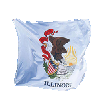

In [11]:
flag_path = 'images\\illinois_test.png'

in_image = image.load_img(flag_path, target_size = image_shape)
in_image

In [12]:
in_image_array = image.img_to_array(in_image)
in_image_array = np.expand_dims(in_image_array, axis= 0)
max_index_row = np.argmax(model.predict(in_image_array), axis=1)
df.iloc[max_index_row]

,Country,ImageURL
20,Massachusetts,https://upload.wikimedia.org/wikipedia/commons...


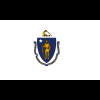

In [20]:
flag_path = 'States\\' + df.iloc[max_index_row].iloc[0,0] +"\\"
flag_path = flag_path + os.listdir(flag_path)[0]

in_image = image.load_img(flag_path, target_size = image_shape)
in_image